In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.stats import skewnorm, gamma, expon, uniform, bernoulli, binom, poisson

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
normal_data = stats.norm.rvs(size=1000, loc=0, scale=1)

normal_data = np.array(normal_data)

min(normal_data), max(normal_data)

(-3.288059168668082, 3.0460170750615485)

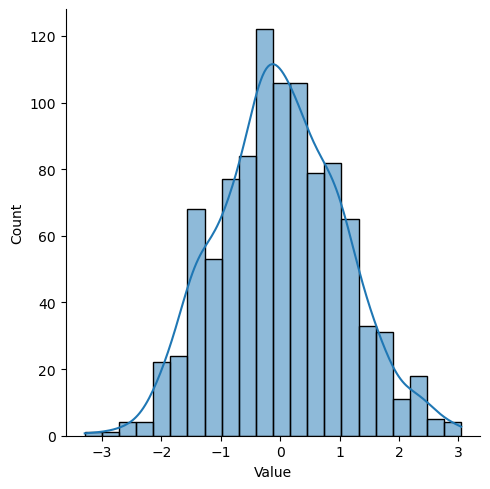

In [4]:
dataframe = pd.DataFrame(normal_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [5]:
np.mean(normal_data), np.median(normal_data), stats.mode(normal_data), np.var(
    normal_data
), np.std(normal_data)

(0.00957967780749,
 -0.022975793450551677,
 ModeResult(mode=-3.288059168668082, count=1),
 1.0790687601447262,
 1.0387823449331077)

In [6]:
# Between mean and mean + std
a = normal_data >= np.mean(normal_data)

b = normal_data <= np.mean(normal_data) + np.std(normal_data)

np.sum(a & b)

331

In [7]:
# Between mean and mean - std
a = normal_data >= np.mean(normal_data) - np.std(normal_data)

b = normal_data <= np.mean(normal_data)

np.sum(a & b)

348

In [8]:
# Between mean - std and mean + std
a = normal_data >= np.mean(normal_data) - np.std(normal_data)

b = normal_data <= np.mean(normal_data) + np.std(normal_data)

np.sum(a & b)

679

In [9]:
699 / 1000

0.699

In [10]:
height_data = np.array(
    [
        126.0,
        129.5,
        133.0,
        133.0,
        136.5,
        136.5,
        140.0,
        140.0,
        140.0,
        140.0,
        143.5,
        143.5,
        143.5,
        143.5,
        143.5,
        143.5,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        147.0,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        150.5,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        154.0,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        157.5,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        161.0,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        164.5,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        168.0,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        171.5,
        175.0,
        175.0,
        175.0,
        175.0,
        175.0,
        175.0,
        178.5,
        178.5,
        178.5,
        178.5,
        182.0,
        182.0,
        185.5,
        185.5,
        189.0,
        192.5,
    ]
)

In [11]:
len(height_data), min(height_data), max(height_data), np.mean(height_data), np.median(
    height_data
), stats.mode(height_data), np.var(height_data), np.std(height_data), stats.variation(
    height_data
) * 100

(100,
 126.0,
 192.5,
 159.25,
 159.25,
 ModeResult(mode=157.5, count=10),
 186.3225,
 13.65,
 8.571428571428571)

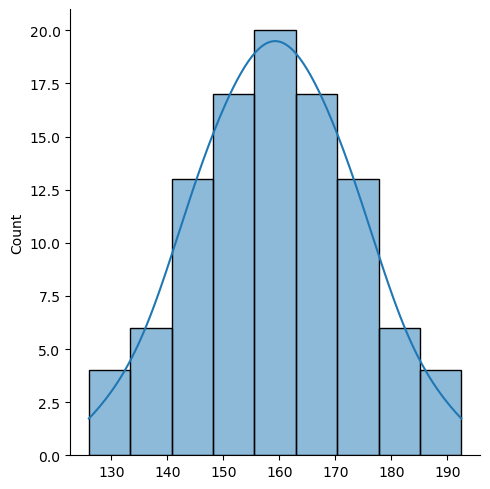

In [12]:
sns.displot(height_data, kde=True)

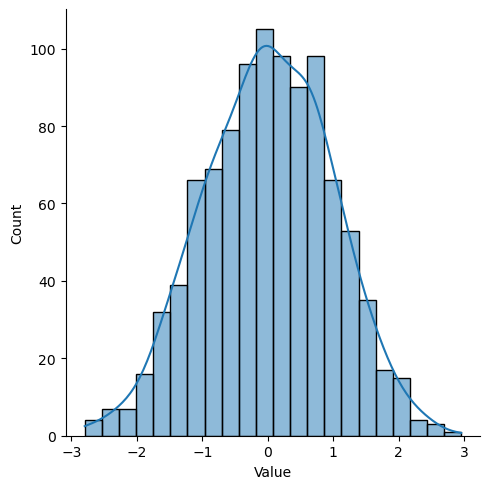

In [13]:
normal_data = skewnorm.rvs(a=0, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(normal_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [14]:
np.mean(normal_data), np.median(normal_data), stats.mode(normal_data), np.var(
    normal_data
), np.std(normal_data)

(0.012582854449879782,
 0.02169811394621461,
 ModeResult(mode=-2.7965329145025364, count=1),
 0.9429333445460762,
 0.971047550095296)

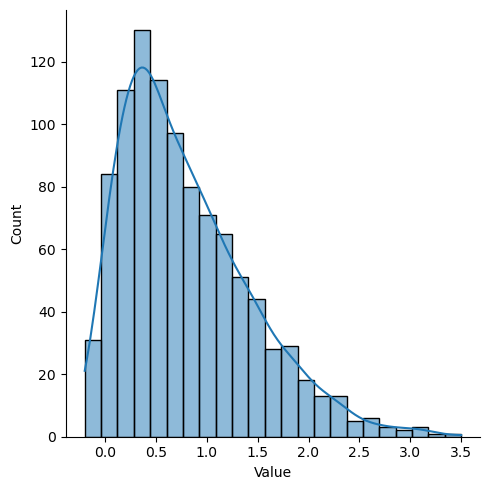

In [15]:
positive_data = skewnorm.rvs(a=10, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(positive_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [16]:
np.mean(positive_data), np.median(positive_data), stats.mode(positive_data), np.var(
    positive_data
), np.std(positive_data)

(0.7952069728873029,
 0.6678342394147165,
 ModeResult(mode=-0.20107321399501574, count=1),
 0.4006795725919133,
 0.6329925533463354)

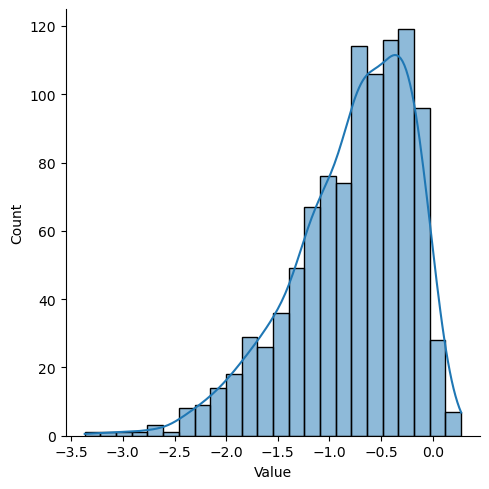

In [17]:
negative_data = skewnorm.rvs(a=-10, loc=0, scale=1, size=1000)

dataframe = pd.DataFrame(negative_data, columns=["Value"])

sns.displot(dataframe, x="Value", kde=True)

In [18]:
np.mean(negative_data), np.median(negative_data), stats.mode(negative_data), np.var(
    negative_data
), np.std(negative_data)

(-0.7829547839542873,
 -0.6845366496990486,
 ModeResult(mode=-3.3692744570374167, count=1),
 0.33527395578866803,
 0.5790284585308981)

#### Standardized normal distribution

In [19]:
standart_normal_data = np.random.normal(loc=0, scale=1, size=1000)

min(standart_normal_data), max(standart_normal_data)

(-3.2752806845115074, 2.7720992808124274)

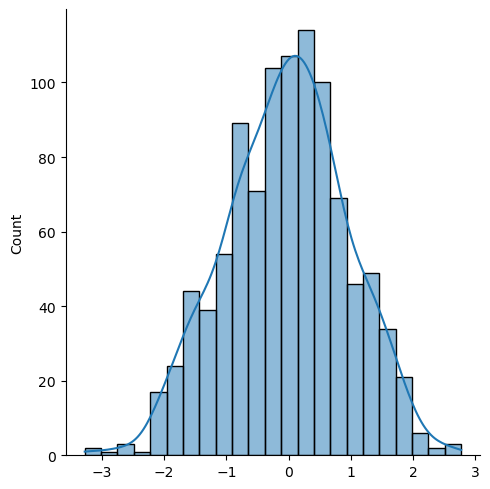

In [20]:
sns.displot(standart_normal_data, kde=True)

In [21]:
standart_normal_data.mean(), np.std(standart_normal_data),

(-0.036353941356811484, 0.9753788036542897)

In [22]:
mean_height = height_data.mean()

mean_height

159.25

In [23]:
std_height = height_data.std()

std_height

13.65

In [24]:
standart_height_data = (height_data - mean_height) / std_height

standart_height_data

array([-2.43589744, -2.17948718, -1.92307692, -1.92307692, -1.66666667,
       -1.66666667, -1.41025641, -1.41025641, -1.41025641, -1.41025641,
       -1.15384615, -1.15384615, -1.15384615, -1.15384615, -1.15384615,
       -1.15384615, -0.8974359 , -0.8974359 , -0.8974359 , -0.8974359 ,
       -0.8974359 , -0.8974359 , -0.8974359 , -0.64102564, -0.64102564,
       -0.64102564, -0.64102564, -0.64102564, -0.64102564, -0.64102564,
       -0.64102564, -0.38461538, -0.38461538, -0.38461538, -0.38461538,
       -0.38461538, -0.38461538, -0.38461538, -0.38461538, -0.38461538,
       -0.12820513, -0.12820513, -0.12820513, -0.12820513, -0.12820513,
       -0.12820513, -0.12820513, -0.12820513, -0.12820513, -0.12820513,
        0.12820513,  0.12820513,  0.12820513,  0.12820513,  0.12820513,
        0.12820513,  0.12820513,  0.12820513,  0.12820513,  0.12820513,
        0.38461538,  0.38461538,  0.38461538,  0.38461538,  0.38461538,
        0.38461538,  0.38461538,  0.38461538,  0.38461538,  0.64

In [25]:
standart_height_data.mean(), standart_height_data.std()

(0.0, 0.9999999999999999)

#### Central limit theorem

In [26]:
heights = np.random.randint(126, 192, 500)

heights.mean()

160.028

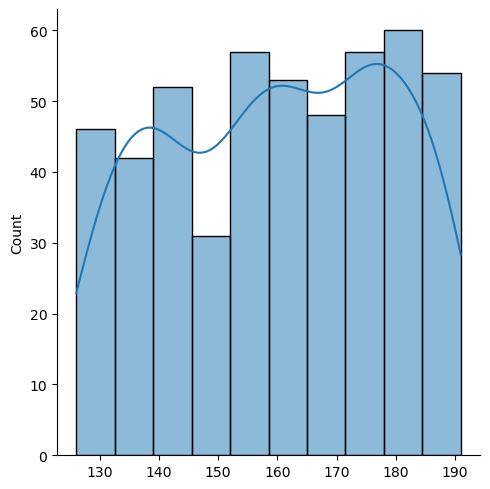

In [27]:
sns.displot(heights, kde=True)

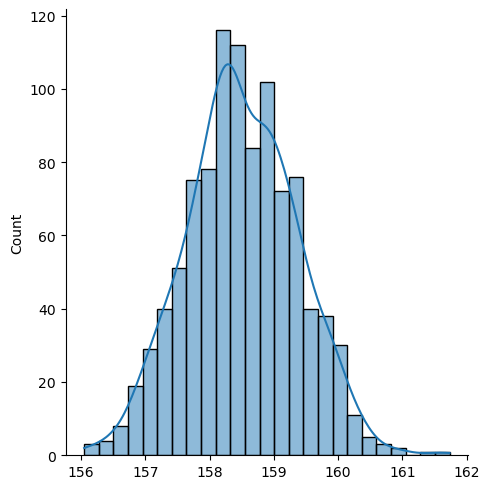

In [28]:
mean_height = np.array([np.random.randint(126, 192, 500).mean() for _ in range(1000)])

sns.displot(mean_height, kde=True)

#### Gamma distribution

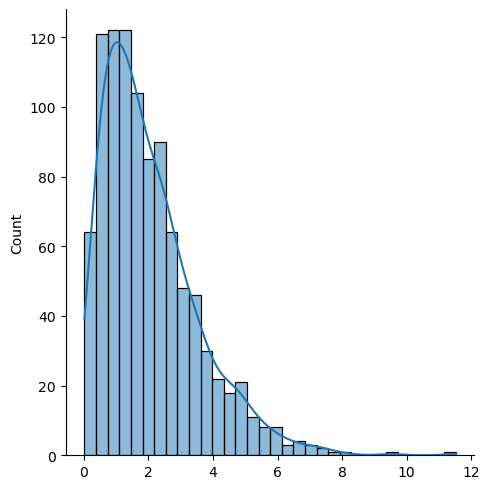

In [29]:
gamma_data = np.array(gamma.rvs(a=2, loc=0, scale=1, size=1000))

sns.displot(gamma_data, kde=True)

In [30]:
min(gamma_data), max(gamma_data)

(0.019996064230775927, 11.524001878901442)

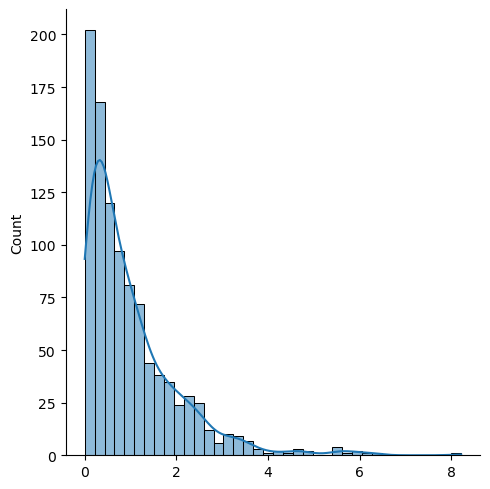

In [31]:
expon_data = np.array(expon.rvs(loc=0, scale=1, size=1000))

sns.displot(expon_data, kde=True)

In [32]:
min(expon_data), max(expon_data)

(0.0007875109270981622, 8.213460005595472)

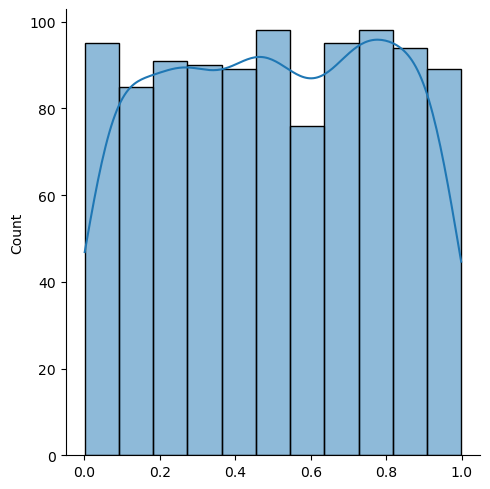

In [33]:
uniform_data = np.array(uniform.rvs(loc=0, scale=1, size=1000))

sns.displot(uniform_data, kde=True)

In [34]:
min(uniform_data), max(uniform_data)

(0.0007701139169593585, 0.9988732482297531)

In [35]:
credit_data = pd.read_csv("data/credit_data.csv")

credit_data.dropna(inplace=True)

credit_data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [36]:
X = credit_data[["income", "age", "loan"]]
y = credit_data["c#default"]

In [37]:
results_naive_bayes = []

for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=i
    )

    naive_bayes = GaussianNB()

    naive_bayes.fit(X_train, y_train)

    y_pred = naive_bayes.predict(X_test)

    results_naive_bayes.append(accuracy_score(y_test, y_pred))


print(results_naive_bayes)

[0.9225, 0.9375, 0.915, 0.9275, 0.94, 0.9125, 0.945, 0.9325, 0.9225, 0.895, 0.9225, 0.93, 0.925, 0.9275, 0.915, 0.92, 0.92, 0.94, 0.925, 0.9325, 0.9, 0.935, 0.9225, 0.925, 0.915, 0.9225, 0.92, 0.9325, 0.9275, 0.93]


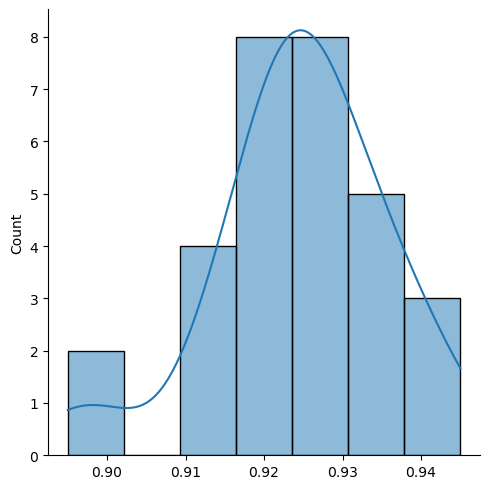

In [38]:
sns.displot(results_naive_bayes, kde=True)

In [39]:
data_bernoulli = np.array(bernoulli.rvs(size=1000, p=0.6))

np.unique(data_bernoulli, return_counts=True)

(array([0, 1]), array([399, 601]))

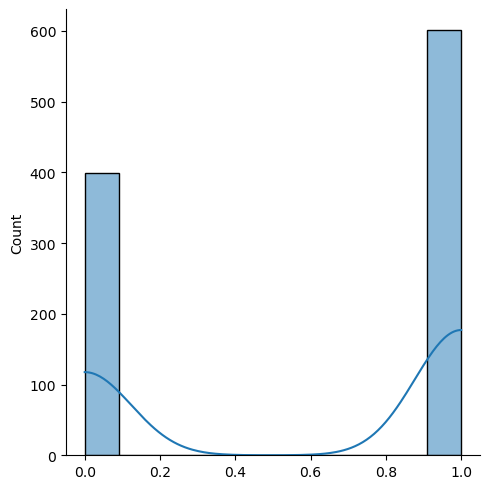

In [40]:
sns.displot(data_bernoulli, kde=True)

In [41]:
data_binom = np.array(binom.rvs(n=10, p=0.7, size=1000))

np.unique(data_binom, return_counts=True)

(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([  5,   7,  35,  95, 213, 277, 221, 126,  21]))

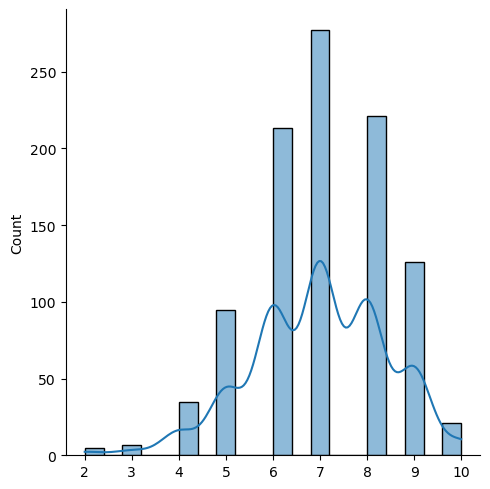

In [42]:
sns.displot(data_binom, kde=True)

In [43]:
data_poisson = np.array(poisson.rvs(mu=1, size=1000))

min(data_poisson), max(data_poisson)

(0, 7)

In [44]:
np.unique(data_poisson, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([348, 379, 187,  64,  16,   4,   1,   1]))

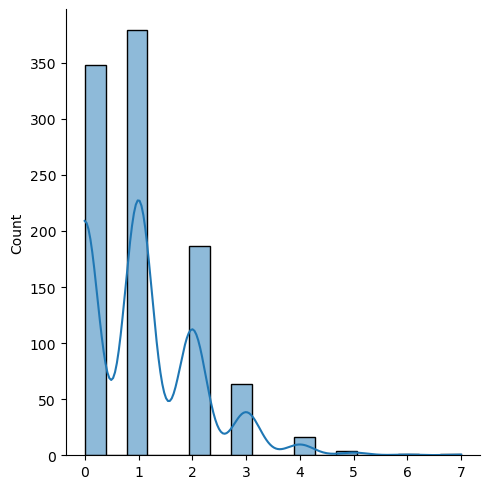

In [45]:
sns.displot(data_poisson, kde=True)

#### Exercise

In [46]:
census_data = pd.read_csv("data/census.csv")

census_data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


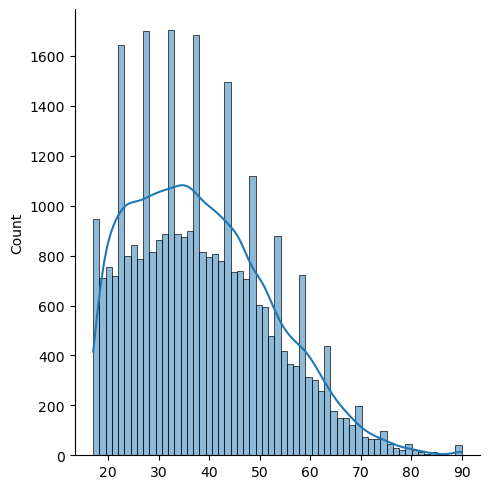

In [47]:
census_age = np.array(census_data["age"])

sns.displot(census_age, kde=True)

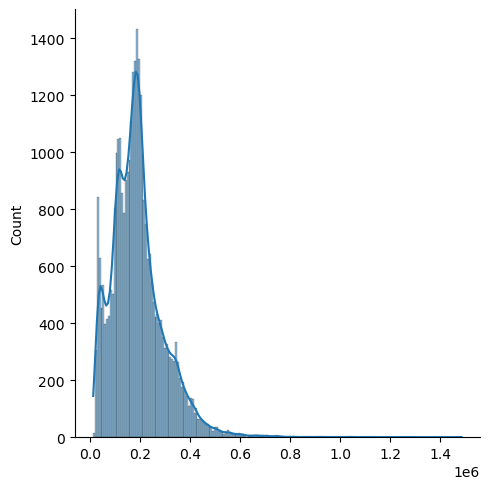

In [48]:
census_final_weight = np.array(census_data["final-weight"])

sns.displot(census_final_weight, kde=True)

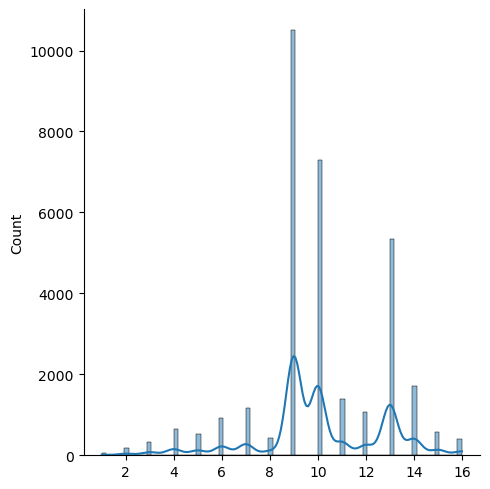

In [49]:
census_education_num = np.array(census_data["education-num"])

sns.displot(census_education_num, kde=True)

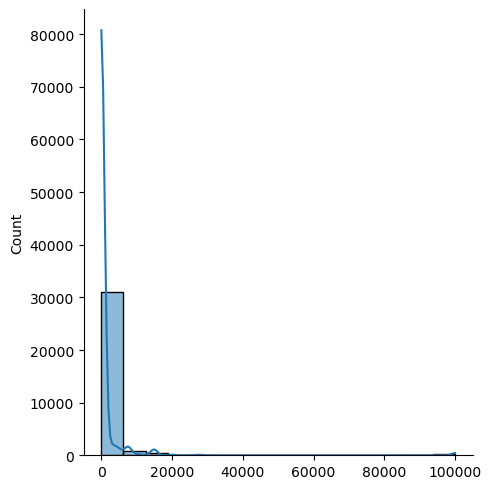

In [50]:
census_capital_gain = np.array(census_data["capital-gain"])

sns.displot(census_capital_gain, kde=True)

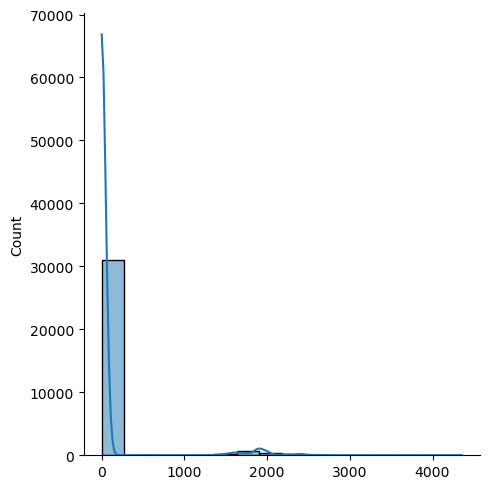

In [51]:
census_capital_loos = np.array(census_data["capital-loos"])

sns.displot(census_capital_loos, kde=True)

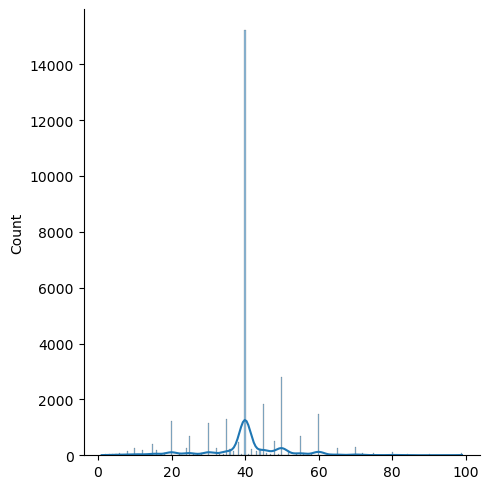

In [52]:
census_hour_per_week = np.array(census_data["hour-per-week"])

sns.displot(census_hour_per_week, kde=True)

<Axes: xlabel='count'>

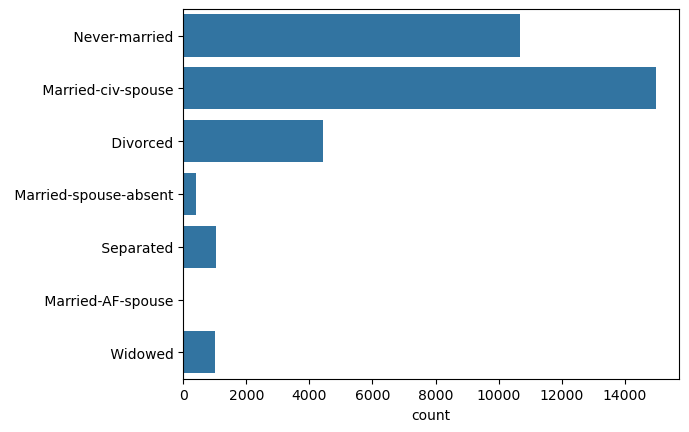

In [53]:
census_marital_status = np.array(census_data["marital-status"])

sns.countplot(census_marital_status)

<Axes: xlabel='count'>

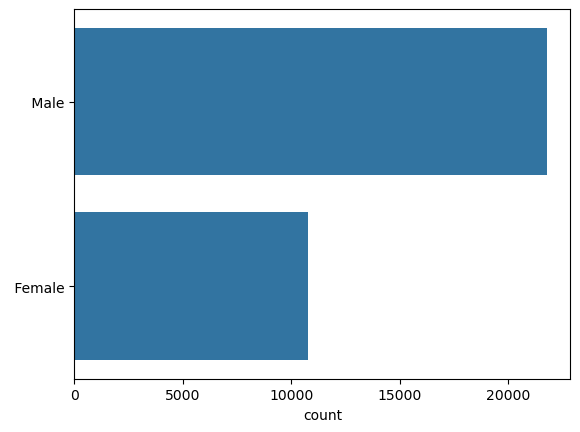

In [54]:
census_sex = np.array(census_data['sex'])

sns.countplot(census_sex)

<Axes: xlabel='count'>

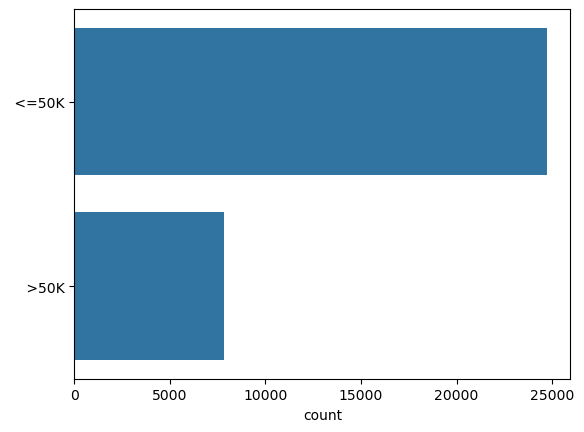

In [55]:
census_income = np.array(census_data['income'])

sns.countplot(census_income)

In [56]:
credit_data = pd.read_csv("data/credit_data.csv")

credit_data.dropna(inplace=True)

credit_data.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


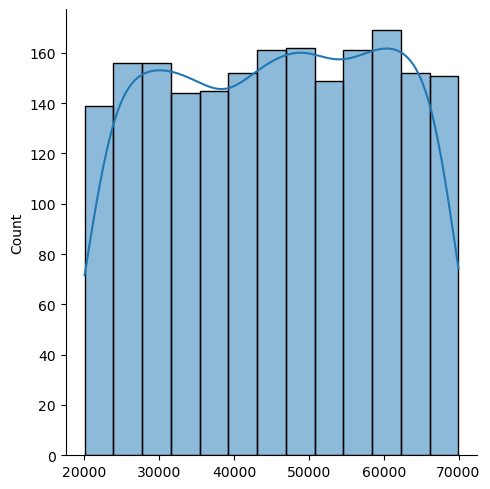

In [57]:
credit_income = np.array(credit_data["income"])

sns.displot(credit_income, kde=True)

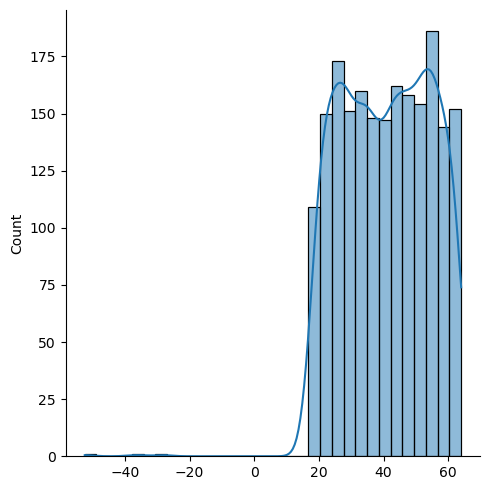

In [58]:
credit_age = np.array(credit_data["age"])

sns.displot(credit_age, kde=True)

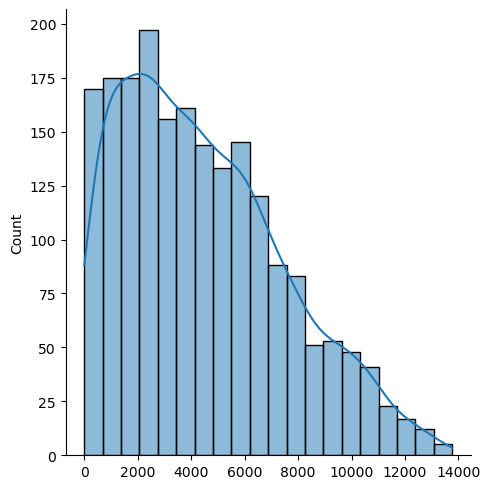

In [59]:
credit_load = np.array(credit_data["loan"])

sns.displot(credit_load, kde=True)

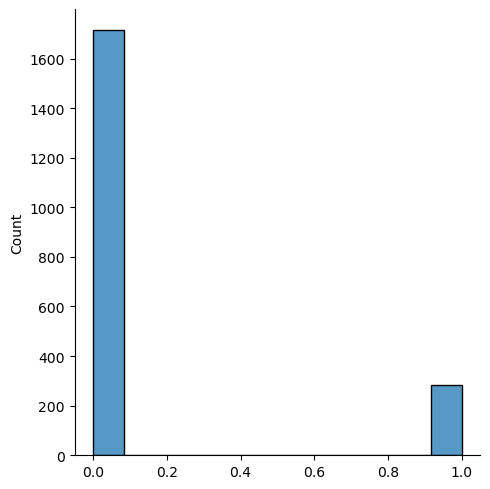

In [60]:
credit_c_defult = np.array(credit_data["c#default"])

sns.displot(credit_c_defult)

In [61]:
census_data = pd.read_csv("data/census.csv")

census_data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
census_data['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [63]:
X = np.array(census_data["sex"].values)
y = np.array(census_data["income"].values)

label_encoder = LabelEncoder()

X = np.array(label_encoder.fit_transform(X))

X, np.unique(X)

(array([1, 1, 1, ..., 0, 1, 0]), array([0, 1]))

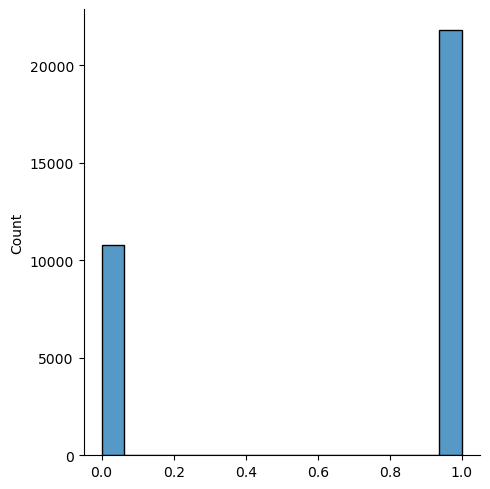

In [64]:
sns.displot(X, kde=False)

In [65]:
X.shape

(32561,)

In [66]:
X = X.reshape(-1, 1)

X.shape

(32561, 1)

#### Bernoulli

In [67]:
bernoulli_naive_bayes = BernoulliNB()

bernoulli_naive_bayes.fit(X, y)

BernoulliNB()

In [68]:
prediction = bernoulli_naive_bayes.predict(X)

prediction, y

(array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [69]:
accuracy_score(y, prediction)

0.7591904425539756

#### Multinomial

In [70]:
census_categorical_data = census_data.select_dtypes(include='object')

census_categorical_data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [88]:
X = census_categorical_data.drop(columns='income')
y = np.array(census_data["income"].values)

# Apply LabelEncoder column by column and convert back to DataFrame
X = X.apply(lambda col: pd.Series(LabelEncoder().fit_transform(col), index=col.index))

X.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,7,9,4,1,1,4,1,39
1,6,9,2,4,0,4,1,39
2,4,11,0,6,1,4,1,39
3,4,1,2,6,0,2,1,39
4,4,9,2,10,5,2,0,5


In [77]:
multinomial_naive_bayes = MultinomialNB()

multinomial_naive_bayes.fit(X, y)

MultinomialNB()

In [78]:
prediction = multinomial_naive_bayes.predict(X)

prediction, y

(array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [79]:
accuracy_score(y, prediction)

0.7450016891373115

#### Full Database

In [95]:
census_data = pd.read_csv("data/census.csv")

y = np.array(census_data["income"].values)

census_data.drop(columns='income', inplace=True)

for column in census_data.select_dtypes(include='object').columns:
    label_encoder = LabelEncoder()
    census_data[column] = label_encoder.fit_transform(census_data[column])

census_data.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [97]:
X = census_data.values

X


array([[    39,      7,  77516, ...,      0,     40,     39],
       [    50,      6,  83311, ...,      0,     13,     39],
       [    38,      4, 215646, ...,      0,     40,     39],
       ...,
       [    58,      4, 151910, ...,      0,     40,     39],
       [    22,      4, 201490, ...,      0,     20,     39],
       [    52,      5, 287927, ...,      0,     40,     39]])

In [98]:
multinomial_naive_bayes = MultinomialNB()

multinomial_naive_bayes.fit(X, y)

prediction = multinomial_naive_bayes.predict(X)

prediction, y

(array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype='<U6'),
 array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
       dtype=object))

In [99]:
accuracy_score(y, prediction)

0.7825619606277449